# Analyzing Datasets using SQL and IBM Db2 on Cloud

### **Connect to the database**

In [1]:
%load_ext sql

In [2]:
# %sql ibm_db_sa://my-username:my-password@my-hostname:my-port/my-db-name
%sql ibm_db_sa://ghw47050:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB

#### **1. Socioeconomic Indicators in Chicago**
 - This dataset contains a selection of six socioeconomic indicators of public health significance and a “hardship index,” for each Chicago community area, for the years 2008 – 2012.
 
#### **2. Chicago Public Schools**
 - This dataset shows all school level performance data used to create CPS School Report Cards for the 2011-2012 school year. This dataset is provided by the city of Chicago's Data Portal.

#### **3. Chicago Crime Data**
 - This dataset reflects reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Chicago from 2001 to present, minus the most recent seven days.

In [3]:
# Rows in Crime table
%sql select count(*) as NUMBER_OF_CRIME_RECORDS from CHICAGO_CRIME_DATA;

 * ibm_db_sa://ghw47050:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB
Done.


number_of_crime_records
533


In [4]:
# Retrieve first 10 rows from the CRIME table
%sql select * from CHICAGO_CRIME_DATA \
        limit 10;

 * ibm_db_sa://ghw47050:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB
Done.


id,case_number,DATE,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area_number,fbicode,x_coordinate,y_coordinate,YEAR,updatedon,latitude,longitude,location
3512276,HK587712,08/28/2004 05:50:56 PM,047XX S KEDZIE AVE,890,THEFT,FROM BUILDING,SMALL RETAIL STORE,FALSE,FALSE,911,9,14,58,6,1155838,1873050,2004,02/10/2018 03:50:01 PM,41.80744050,-87.70395585,"(41.8074405, -87.703955849)"
3406613,HK456306,06/26/2004 12:40:00 PM,009XX N CENTRAL PARK AVE,820,THEFT,$500 AND UNDER,OTHER,FALSE,FALSE,1112,11,27,23,6,1152206,1906127,2004,02/28/2018 03:56:25 PM,41.89827996,-87.71640551,"(41.898279962, -87.716405505)"
8002131,HT233595,04/04/2011 05:45:00 AM,043XX S WABASH AVE,820,THEFT,$500 AND UNDER,NURSING HOME/RETIREMENT HOME,FALSE,FALSE,221,2,3,38,6,1177436,1876313,2011,02/10/2018 03:50:01 PM,41.81593313,-87.62464213,"(41.815933131, -87.624642127)"
7903289,HT133522,12/30/2010 04:30:00 PM,083XX S KINGSTON AVE,840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,FALSE,FALSE,423,4,7,46,6,1194622,1850125,2010,02/10/2018 03:50:01 PM,41.74366532,-87.56246276,"(41.743665322, -87.562462756)"
10402076,HZ138551,02/02/2016 07:30:00 PM,033XX W 66TH ST,820,THEFT,$500 AND UNDER,ALLEY,FALSE,FALSE,831,8,15,66,6,1155240,1860661,2016,02/10/2018 03:50:01 PM,41.77345530,-87.70648047,"(41.773455295, -87.706480471)"
7732712,HS540106,09/29/2010 07:59:00 AM,006XX W CHICAGO AVE,810,THEFT,OVER $500,PARKING LOT/GARAGE(NON.RESID.),FALSE,FALSE,1323,12,27,24,6,1171668,1905607,2010,02/10/2018 03:50:01 PM,41.89644677,-87.64493868,"(41.896446772, -87.644938678)"
10769475,HZ534771,11/30/2016 01:15:00 AM,050XX N KEDZIE AVE,810,THEFT,OVER $500,STREET,FALSE,FALSE,1713,17,33,14,6,1154133,1933314,2016,02/10/2018 03:50:01 PM,41.97284491,-87.70860008,"(41.972844913, -87.708600079)"
4494340,HL793243,12/16/2005 04:45:00 PM,005XX E PERSHING RD,860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,TRUE,FALSE,213,2,3,38,6,1180448,1879234,2005,02/28/2018 03:56:25 PM,41.82387989,-87.61350386,"(41.823879885, -87.613503857)"
3778925,HL149610,01/28/2005 05:00:00 PM,100XX S WASHTENAW AVE,810,THEFT,OVER $500,STREET,FALSE,FALSE,2211,22,19,72,6,1160129,1838040,2005,02/28/2018 03:56:25 PM,41.71128051,-87.68917910,"(41.711280513, -87.689179097)"
3324217,HK361551,05/13/2004 02:15:00 PM,033XX W BELMONT AVE,820,THEFT,$500 AND UNDER,SMALL RETAIL STORE,FALSE,FALSE,1733,17,35,21,6,1153590,1921084,2004,02/28/2018 03:56:25 PM,41.93929582,-87.71092344,"(41.939295821, -87.710923442)"


In [18]:
# Number of crimes involve an arrest
%sql select count(*) as NUMBER_OF_ARRESTS from CHICAGO_CRIME_DATA \
    where ARREST = 'TRUE';

 * ibm_db_sa://ghw47050:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB
Done.


number_of_arrests
163


In [20]:
# Unique types of crimes recorded at GAS STATION locations
%sql select distinct(PRIMARY_TYPE) from CHICAGO_CRIME_DATA \
    where LOCATION_DESCRIPTION = 'GAS STATION';

 * ibm_db_sa://ghw47050:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB
Done.


primary_type
CRIMINAL TRESPASS
NARCOTICS
ROBBERY
THEFT


In [21]:
# List all Community Areas in the CENUS_DATA table whose names start with the letter ‘B’
%sql select COMMUNITY_AREA_NAME from CENSUS_DATA \
    where COMMUNITY_AREA_NAME like 'B%';

 * ibm_db_sa://ghw47050:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB
Done.


community_area_name
Belmont Cragin
Burnside
Brighton Park
Bridgeport
Beverly


In [22]:
# Schools in Community Areas 10 to 15 that are healthy school certified
%sql select NAME_OF_SCHOOL, COMMUNITY_AREA_NUMBER, HEALTHY_SCHOOL_CERTIFIED from CHICAGO_PUBLIC_SCHOOLS \
    where COMMUNITY_AREA_NUMBER between 10 and 15 and HEALTHY_SCHOOL_CERTIFIED = 'Yes';

 * ibm_db_sa://ghw47050:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB
Done.


name_of_school,community_area_number,healthy_school_certified
Rufus M Hitch Elementary School,10,Yes


In [31]:
# Top 10 schools with the highest "Average Student Attendance"
%sql select NAME_OF_SCHOOL, AVERAGE_STUDENT_ATTENDANCE \
    from SCHOOLS \
    order by AVERAGE_STUDENT_ATTENDANCE desc nulls last \
    limit 10;

 * ibm_db_sa://ghw47050:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB
Done.


name_of_school,average_student_attendance
John Charles Haines Elementary School,98.40%
James Ward Elementary School,97.80%
Edgar Allan Poe Elementary Classical School,97.60%
Orozco Fine Arts & Sciences Elementary School,97.60%
Rachel Carson Elementary School,97.60%
Annie Keller Elementary Gifted Magnet School,97.50%
Andrew Jackson Elementary Language Academy,97.40%
Lenart Elementary Regional Gifted Center,97.40%
Disney II Magnet School,97.30%
John H Vanderpoel Elementary Magnet School,97.20%


In [23]:
# Average school Safety Score
%sql select avg(SAFETY_SCORE) as AVERAGE_SAFETY_SCORE from CHICAGO_PUBLIC_SCHOOLS;

 * ibm_db_sa://ghw47050:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB
Done.


average_safety_score
49.504873


In [32]:
# 5 Schools with the lowest Average Student Attendance sorted in ascending order based on attendance
%sql select NAME_OF_SCHOOL, AVERAGE_STUDENT_ATTENDANCE \
    from SCHOOLS \
    order by AVERAGE_STUDENT_ATTENDANCE \
    fetch first 5 rows only;

 * ibm_db_sa://ghw47050:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB
Done.


name_of_school,average_student_attendance
Richard T Crane Technical Preparatory High School,57.90%
Barbara Vick Early Childhood & Family Center,60.90%
Dyett High School,62.50%
Wendell Phillips Academy High School,63.00%
Orr Academy High School,66.30%


In [26]:
# Top 5 Community Areas by average College Enrollment [number of students]
%sql select COMMUNITY_AREA_NAME, sum(COLLEGE_ENROLLMENT) as AVERAGE_COLLEGE_ENROLLMENT \
        from CHICAGO_PUBLIC_SCHOOLS \
        group by COMMUNITY_AREA_NAME \
        order by AVERAGE_COLLEGE_ENROLLMENT desc \
        fetch first 5 rows only;

 * ibm_db_sa://ghw47050:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB
Done.


community_area_name,average_college_enrollment
SOUTH LAWNDALE,14793
BELMONT CRAGIN,14386
AUSTIN,10933
GAGE PARK,9915
BRIGHTON PARK,9647


In [27]:
# Community Area with the lowest school Safety Score
%sql select COMMUNITY_AREA_NAME, SAFETY_SCORE from CHICAGO_PUBLIC_SCHOOLS \
    where SAFETY_SCORE = (select min(SAFETY_SCORE) from CHICAGO_PUBLIC_SCHOOLS);

 * ibm_db_sa://ghw47050:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB
Done.


community_area_name,safety_score
WASHINGTON PARK,1


In [30]:
# Per Capita Income of the Community Area which has a school Safety Score of 1
%sql select CPS.COMMUNITY_AREA_NAME, CPS.SAFETY_SCORE, CD.PER_CAPITA_INCOME \
    from CHICAGO_PUBLIC_SCHOOLS CPS, CENSUS_DATA CD \
        where CPS.COMMUNITY_AREA_NUMBER = CD.COMMUNITY_AREA_NUMBER AND CPS.SAFETY_SCORE = 1;
        

%sql select COMMUNITY_AREA_NAME, PER_CAPITA_INCOME from CENSUS_DATA \
    where UCASE(COMMUNITY_AREA_NAME) in \
    (select COMMUNITY_AREA_NAME from CHICAGO_PUBLIC_SCHOOLS \
    where SAFETY_SCORE = 1);

 * ibm_db_sa://ghw47050:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB
Done.
 * ibm_db_sa://ghw47050:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB
Done.


community_area_name,per_capita_income
Washington Park,13785


In [33]:
# Hardship index for the community area which has the highest value for College Enrollment
%sql select CPS.COMMUNITY_AREA_NAME, CD.HARDSHIP_INDEX \
    from CHICAGO_SOCIOECONOMIC_DATA CD, SCHOOLS CPS \
    where CD.ca = CPS.COMMUNITY_AREA_NUMBER \
        and college_enrollment = (select max(college_enrollment) from SCHOOLS);


%sql select ca, community_area_name, hardship_index from chicago_socioeconomic_data \
   where ca in \
   ( select community_area_number from schools order by college_enrollment desc limit 1 );

 * ibm_db_sa://ghw47050:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB
Done.
 * ibm_db_sa://ghw47050:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB
Done.


ca,community_area_name,hardship_index
5.0,North Center,6.0


 * ibm_db_sa://ghw47050:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB
Done.
 * ibm_db_sa://ghw47050:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB
Done.
 * ibm_db_sa://ghw47050:***@dashdb-txn-sbox-yp-dal09-10.services.dal.bluemix.net:50000/BLUDB
Done.


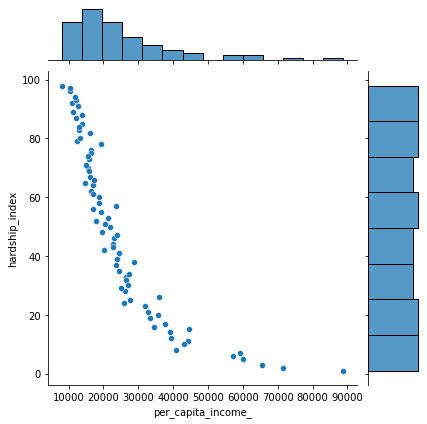

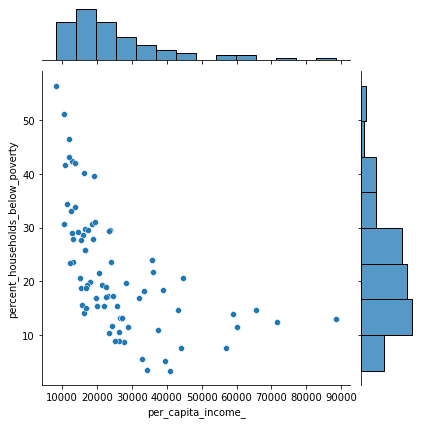

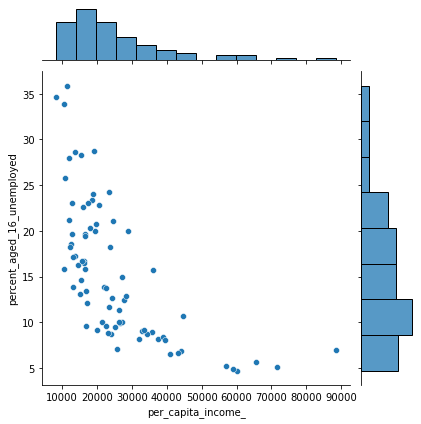

In [34]:
# Scatter plot using the variables per_capita_income_ and hardship_index
import matplotlib.pyplot as plt
import seaborn as sns

income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;
plot_1 = sns.jointplot(x='per_capita_income_', y='hardship_index', data=income_vs_hardship.DataFrame())

income_vs_perc_hh_below_poverty = %sql SELECT per_capita_income_, percent_households_below_poverty FROM chicago_socioeconomic_data;
plot_2 = sns.jointplot(x='per_capita_income_', y='percent_households_below_poverty', data=income_vs_perc_hh_below_poverty.DataFrame())

income_vs_perc_aged_16_unempl = %sql SELECT per_capita_income_, percent_aged_16_unemployed FROM chicago_socioeconomic_data;
plot_3 = sns.jointplot(x='per_capita_income_', y='percent_aged_16_unemployed', data=income_vs_perc_aged_16_unempl.DataFrame())
